In [1]:


import csv
import datetime
import numpy as np

import pandas as pd
import pandas_datareader.data as web

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

#benimmmmmm
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV,Lasso,Ridge,LassoCV,ElasticNet,ElasticNetCV
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR,SVC
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()


import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Get the stock data using yahoo API:

ModuleNotFoundError: No module named 'pandas_datareader'

In [4]:
style.use('ggplot')

# get 2014-2018 data to train our model
start = datetime.datetime(2017,5,28)
end = datetime.datetime(2021,5,28)
df = web.DataReader("TSLA", 'yahoo', start, end) 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-30,67.255997,65.152000,65.199997,67.019997,38914500.0,67.019997
2017-05-31,68.578003,67.031998,67.538002,68.202003,49817000.0,68.202003
2017-06-01,68.975998,67.458000,68.800003,68.073997,38040000.0,68.073997
2017-06-02,68.575996,67.185997,67.954002,67.970001,27951000.0,67.970001
2017-06-05,69.688004,66.842003,67.699997,69.463997,33922000.0,69.463997
...,...,...,...,...,...,...
2021-05-24,614.479980,573.650024,581.599976,606.440002,34558100.0,606.440002
2021-05-25,613.989990,595.710022,607.309998,604.690002,28005900.0,604.690002
2021-05-26,626.169983,601.500000,607.559998,619.130005,28639300.0,619.130005


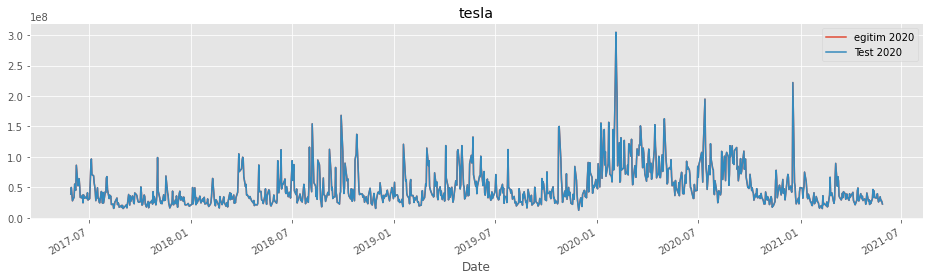

In [5]:

df.isnull().sum()

df["Volume"][:2020].plot(figsize=(16,4),legend=True)
df["Volume"][:2021].plot(figsize=(16,4),legend=True)
plt.legend(["egitim 2020","Test 2020"])
plt.title("tesla")
plt.show()





In [6]:
print(df.describe())

              High          Low         Open        Close        Volume  \
count  1008.000000  1008.000000  1008.000000  1008.000000  1.008000e+03   
mean    189.195532   180.163647   184.907661   185.001712  4.955724e+07   
std     227.426325   216.385837   222.364036   222.386001  3.144309e+07   
min      37.335999    35.397999    36.220001    35.793999  1.232800e+07   
25%      61.195000    58.736000    60.062001    60.007999  2.883530e+07   
50%      69.839996    67.658001    68.968002    68.910000  3.912425e+07   
75%     180.283001   172.301006   177.711994   177.202003  6.072200e+07   
max     900.400024   871.599976   891.380005   883.090027  3.046940e+08   

         Adj Close  
count  1008.000000  
mean    185.001712  
std     222.386001  
min      35.793999  
25%      60.007999  
50%      68.910000  
75%     177.202003  
max     883.090027  


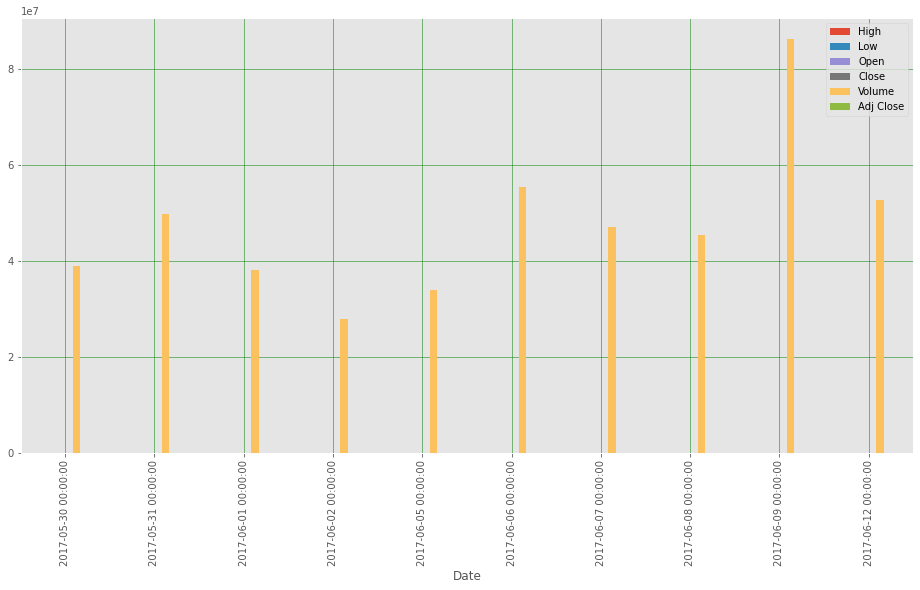

In [7]:



df.head(10).plot(kind="bar",figsize=(16,8))

plt.grid(which="major",linestyle="-",linewidth=0.5,color="green")

plt.grid(which="minor",linestyle=":",linewidth=0.5,color="black")

plt.show()

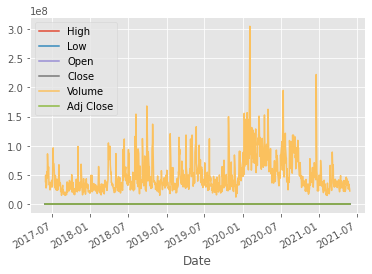

In [8]:

df.plot()
plt.show()

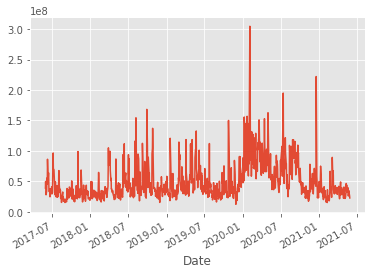

In [9]:


df['Volume'].plot()
plt.show()

                 High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2017-05-30  67.255997  65.152000  65.199997  67.019997  38914500.0  67.019997   
2017-05-31  68.578003  67.031998  67.538002  68.202003  49817000.0  68.202003   
2017-06-01  68.975998  67.458000  68.800003  68.073997  38040000.0  68.073997   
2017-06-02  68.575996  67.185997  67.954002  67.970001  27951000.0  67.970001   
2017-06-05  69.688004  66.842003  67.699997  69.463997  33922000.0  69.463997   

            100ma  
Date               
2017-05-30    NaN  
2017-05-31    NaN  
2017-06-01    NaN  
2017-06-02    NaN  
2017-06-05    NaN  
                 High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2017-05-30  67.255997  65.152000  65.199997  67.019997  38914500.0  67.019997   
2017-05-31  68.578003  67.031998  67.538002  68.2

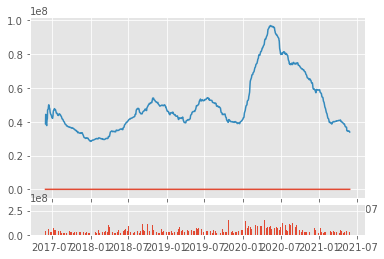

In [10]:

df['100ma'] = df['Volume'].rolling(window=100).mean()
print(df.head())

df['100ma'] = df['Volume'].rolling(window=100,min_periods=0).mean()
print(df.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [21]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Get the stock data using yahoo API:
style.use('ggplot')

# get 2014-2018 data to train our model
start = datetime.datetime(2017,5,28)
end = datetime.datetime(2021,5,28)
df = web.DataReader("TSLA", 'yahoo', start, end) 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-30,67.255997,65.152000,65.199997,67.019997,38914500.0,67.019997
2017-05-31,68.578003,67.031998,67.538002,68.202003,49817000.0,68.202003
2017-06-01,68.975998,67.458000,68.800003,68.073997,38040000.0,68.073997
2017-06-02,68.575996,67.185997,67.954002,67.970001,27951000.0,67.970001
2017-06-05,69.688004,66.842003,67.699997,69.463997,33922000.0,69.463997
...,...,...,...,...,...,...
2021-05-24,614.479980,573.650024,581.599976,606.440002,34558100.0,606.440002
2021-05-25,613.989990,595.710022,607.309998,604.690002,28005900.0,604.690002
2021-05-26,626.169983,601.500000,607.559998,619.130005,28639300.0,619.130005


In [22]:

from sklearn.svm import SVR


df = df.dropna()
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-30,67.255997,65.152000,65.199997,67.019997,38914500.0,67.019997
2017-05-31,68.578003,67.031998,67.538002,68.202003,49817000.0,68.202003
2017-06-01,68.975998,67.458000,68.800003,68.073997,38040000.0,68.073997
2017-06-02,68.575996,67.185997,67.954002,67.970001,27951000.0,67.970001
2017-06-05,69.688004,66.842003,67.699997,69.463997,33922000.0,69.463997
...,...,...,...,...,...,...
2021-05-24,614.479980,573.650024,581.599976,606.440002,34558100.0,606.440002
2021-05-25,613.989990,595.710022,607.309998,604.690002,28005900.0,604.690002
2021-05-26,626.169983,601.500000,607.559998,619.130005,28639300.0,619.130005


In [23]:

# sort by date
df = df.sort_values('Date')

# fix the date 
df.reset_index(inplace=True)
uzunluk=len(df["Date"])

for tarih_icin in range(0,uzunluk):
    try:
            
        tarih=[]
        kkk=df["Date"][tarih_icin]
        kkk=str(kkk)
        kkk=kkk.split("-")
        yil=kkk[0]
        ay=kkk[1]
        gun=kkk[2]
        gun=gun.split(" ")
        gun=gun[0]
        tarih.append(yil)
        tarih.append(ay)
        tarih.append(gun)
        
        def listToString(s):    
            str1 = ""   
            for ele in s: 
                str1 += ele      
            return str1 
        
        tarih=(listToString(tarih)) 
        df["Date"][tarih_icin]=tarih
    except:
        pass

In [24]:
y = df["Volume"]
X = df.drop(["Volume"], axis = 1)





X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [25]:

#loj model
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics

#linear

model = LinearRegression()

model.fit(X_train,y_train)

y_pred_linear=model.predict(X_test)



print(model.score(X_test,y_test))
prediction = model.predict(X_test)
prediction[0:10]


0.2377053689077787


array([ 4156531.50522995, 54853673.3016777 , 83505505.0049591 ,
       58163038.61771774, 42095652.84550858, 66287929.51626968,
       67998098.5118866 , 56679546.88555908, 44721354.91791916,
       26985667.63934326])

In [26]:

model = LinearRegression()

model.fit(X_train,y_train)

y_pred_linear=model.predict(X_test)



print("linear model için doğruluk oranı",model.score(X_test,y_test))
prediction = model.predict(X_test)
prediction[0:10]

linear model için doğruluk oranı 0.2377053689077787


array([ 4156531.50522995, 54853673.3016777 , 83505505.0049591 ,
       58163038.61771774, 42095652.84550858, 66287929.51626968,
       67998098.5118866 , 56679546.88555908, 44721354.91791916,
       26985667.63934326])

In [27]:

X_test.reset_index(inplace=True)
uzunluk=len(X_test)
for test_icin in range(0,uzunluk):
    try:
        
        X_test["index"][test_icin]=prediction[test_icin]
    except:
        pass



In [28]:


#ikinci index gerçek değerler
y_test_degerler=y_test.values
X_test.reset_index(inplace=True)
uzunluk=len(X_test)
for test_icin in range(0,uzunluk):
    try:
        
        X_test["level_0"][test_icin]=y_test_degerler[test_icin]
    except:
        pass


In [29]:

   
X_test
X_test=X_test.rename(columns={'index': 'Tahmin'})
X_test=X_test.rename(columns={'level_0': 'Gerçek sonuç'})
X_test

y_test_degerler=y_test.values


sum_column = ((X_test["Gerçek sonuç"] - X_test["Tahmin"]) /X_test["Gerçek sonuç"])*100
X_test["değişim oranı"] = sum_column

print(X_test)
print(X_test[0:20])
print("sonuçlar bu şekildedir")

     Gerçek sonuç    Tahmin      Date        High         Low        Open  \
0        18958300   4156531  20210219  796.789978  777.369995  795.000000   
1        27778000  54853673  20191127   66.786003   65.713997   66.223999   
2       131446500  83505505  20200213  163.600006  147.000000  148.367996   
3        37167000  58163038  20190614   43.330002   42.080002   42.250000   
4        36872500  42095652  20181107   70.236000   68.160004   68.667999   
..            ...       ...       ...         ...         ...         ...   
298      84592500  75899943  20200630  217.537994  200.746002  201.300003   
299      25201500  41890105  20181114   69.421997   67.430000   68.540001   
300      45307500  26932319  20170608   74.379997   72.043999   72.750000   
301      35733000  41290487  20180109   67.760002   65.480003   67.031998   
302      50138500  58385338  20190726   46.051998   44.450001   45.383999   

          Close   Adj Close  değişim oranı  
0    781.299988  781.299988   

In [30]:

"""

yapılacak şey şu tahmin ve bulunannları yazdır.

"""
print("svm için olan kısım")

y = df["Volume"]
X = df.drop(["Volume"], axis = 1)





X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

#svm

svm_tuned = SVC(C = 8, kernel = "poly").fit(X_train, y_train)

y_pred = svm_tuned.predict(X_test)
y_pred[0:10]
(X_test.index.values)
list(X_test.index.values.tolist())

svm için olan kısım


[938,
 630,
 682,
 514,
 365,
 655,
 656,
 529,
 321,
 70,
 792,
 371,
 841,
 456,
 247,
 611,
 705,
 982,
 298,
 101,
 963,
 605,
 213,
 237,
 593,
 281,
 377,
 286,
 388,
 885,
 718,
 835,
 96,
 244,
 736,
 76,
 899,
 209,
 259,
 158,
 495,
 526,
 331,
 954,
 314,
 294,
 381,
 922,
 981,
 877,
 621,
 935,
 59,
 625,
 558,
 745,
 380,
 54,
 23,
 30,
 894,
 429,
 10,
 949,
 811,
 482,
 445,
 199,
 500,
 774,
 107,
 218,
 420,
 174,
 721,
 519,
 453,
 931,
 39,
 551,
 916,
 351,
 66,
 277,
 67,
 908,
 734,
 842,
 296,
 618,
 598,
 817,
 806,
 423,
 758,
 312,
 184,
 332,
 88,
 63,
 832,
 576,
 215,
 604,
 548,
 290,
 788,
 889,
 967,
 944,
 827,
 807,
 694,
 993,
 309,
 86,
 739,
 516,
 310,
 536,
 136,
 873,
 465,
 902,
 261,
 486,
 168,
 830,
 447,
 139,
 740,
 664,
 855,
 440,
 1003,
 531,
 55,
 120,
 528,
 25,
 72,
 44,
 249,
 394,
 914,
 900,
 746,
 198,
 816,
 355,
 323,
 876,
 743,
 235,
 578,
 947,
 941,
 905,
 299,
 60,
 327,
 527,
 599,
 541,
 649,
 917,
 596,
 542,
 962,
 305

In [31]:

#svm için olan kısım
#ilk index tahminler
X_test.reset_index(inplace=True)
uzunluk=len(X_test)
for test_icin in range(0,uzunluk):
    try:
        
        X_test["index"][test_icin]=y_pred[test_icin]
    except:
        pass


In [32]:

#ikinci index gerçek değerler
y_test_degerler=y_test.values
X_test.reset_index(inplace=True)
uzunluk=len(X_test)
for test_icin in range(0,uzunluk):
    try:
        
        X_test["level_0"][test_icin]=y_test_degerler[test_icin]
    except:
        pass

In [33]:

X_test=X_test.rename(columns={'index': 'Tahmin'})
X_test=X_test.rename(columns={'level_0': 'Gerçek sonuç'})


y_test_degerler=y_test.values


sum_column = ((X_test["Gerçek sonuç"] - X_test["Tahmin"]) /X_test["Gerçek sonuç"])*100
X_test["değişim oranı"] = sum_column

In [34]:

print(X_test)
print(X_test[0:20])
print("sonuçlar bu şekildedir")

     Gerçek sonuç    Tahmin      Date        High         Low        Open  \
0        18958300  28637000  20210219  796.789978  777.369995  795.000000   
1        27778000  39975000  20191127   66.786003   65.713997   66.223999   
2       131446500  28637000  20200213  163.600006  147.000000  148.367996   
3        37167000  39975000  20190614   43.330002   42.080002   42.250000   
4        36872500  39975000  20181107   70.236000   68.160004   68.667999   
..            ...       ...       ...         ...         ...         ...   
298      84592500  28637000  20200630  217.537994  200.746002  201.300003   
299      25201500  39975000  20181114   69.421997   67.430000   68.540001   
300      45307500  39975000  20170608   74.379997   72.043999   72.750000   
301      35733000  39975000  20180109   67.760002   65.480003   67.031998   
302      50138500  39975000  20190726   46.051998   44.450001   45.383999   

          Close   Adj Close  değişim oranı  
0    781.299988  781.299988   